# NASA Turbofan Jet Engine Data Set Analysis

## Loading Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## Loading Data

Data downloaded from https://www.kaggle.com/datasets/behrad3d/nasa-cmaps

In [10]:
df1 = pd.read_csv(r"C:\Users\Eduardo\Documents\Data_Testing\CMaps\train_FD001.txt",sep=" |t",engine='python',header=None)

In [11]:
df1.shape

(20631, 26)

In [14]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [24]:
# Checking for empty cells
df1.isna().sum()

unit_number    0
cyc            0
opset1         0
opset2         0
opset3         0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

There are <b>100</b> engines (col 0) in the data. Each engine with different amount of data for 21 sensor columns.<br>
All of the above summarized in a file with 20631 rows and 26 columns

## Renaming Columns

In [19]:
col = ['unit_number','cyc','opset1','opset2','opset3']
for i in range(1,df1.shape[1]-4):
    col.append('s%d'%i)
df1.columns = col

In [6]:
df1.head()

,unit_number,cyc,opset1,opset2,opset3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Sensors Detail

In [15]:
sensors = pd.read_csv(r"C:\Users\Eduardo\Documents\Data_Testing\CMaps\engine_data_cols.csv")
print(sensors)

       Symbol                      Description    Units
0          T2   Total temperature at fan inlet        R
1         T24  Total temperature at LPC outlet        R
2         T30  Total temperature at HPC outlet        R
3         T50  Total temperature at LPT outlet        R
4          P2            Pressure at fan inlet     psia
5         P15    Total pressure in bypass-duct     psia
6         P30     Total pressure at HPC outlet     psia
7          Nf               Physical fan speed      rpm
8          Nc              Physical core speed      rpm
9         epr   Engine pressure ratio (P50/P2)       na
10       Ps30    Static pressure at HPC outlet     psia
11        phi       Ratio of fuel flow to Ps30  pps/psi
12        NRf              Corrected fan speed      rpm
13        NRc             Corrected core speed      rpm
14        BPR                    Bypass Ratio        na
15       farB            Burner fuel-air ratio       na
16    htBleed                   Bleed Enthalpy  

In [25]:
sensor_d = dict(zip(df1.columns[5:],zip(sensors.Symbol,sensors.Description)))

In [26]:
sensor_d

{'s1': ('T2', 'Total temperature at fan inlet'),
 's2': ('T24', 'Total temperature at LPC outlet'),
 's3': ('T30', 'Total temperature at HPC outlet'),
 's4': ('T50', 'Total temperature at LPT outlet'),
 's5': ('P2', 'Pressure at fan inlet'),
 's6': ('P15', 'Total pressure in bypass-duct'),
 's7': ('P30', 'Total pressure at HPC outlet'),
 's8': ('Nf', 'Physical fan speed'),
 's9': ('Nc', 'Physical core speed'),
 's10': ('epr', 'Engine pressure ratio (P50/P2)'),
 's11': ('Ps30', 'Static pressure at HPC outlet'),
 's12': ('phi', 'Ratio of fuel flow to Ps30'),
 's13': ('NRf', 'Corrected fan speed'),
 's14': ('NRc', 'Corrected core speed'),
 's15': ('BPR', 'Bypass Ratio '),
 's16': ('farB', 'Burner fuel-air ratio'),
 's17': ('htBleed', 'Bleed Enthalpy'),
 's18': ('Nf_dmd', 'Demanded fan speed'),
 's19': ('PCNfR_dmd', 'Demanded corrected fan speed'),
 's20': ('W31', 'HPT coolant bleed'),
 's21': ('W32', 'LPT coolant bleed')}

### Getting last parameter on each engine to obtain correlation from all engines

In [20]:
table1 = df1.groupby('unit_number').last()

In [28]:
#Test
np.corrcoef(table1.cyc,table1.s3)[0][1]

-0.027961317790169863

In [11]:
table1

,cyc,opset1,opset2,opset3,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
unit_number,,,,,,,,,,,,,,,,,,,,,
1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649
2,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,21.61,...,519.81,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848
3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,21.61,...,519.53,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562
4,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,21.61,...,519.84,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006
5,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,21.61,...,519.86,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,21.61,...,519.18,2388.24,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258
97,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,21.61,...,519.91,2388.15,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184
98,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,21.61,...,519.55,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137


In [30]:
mean_life = table1.cyc.mean()
print('mean life =',mean_life)
min_life = table1.cyc.min()
max_life = table1.cyc.max()
med_life = table1.cyc.median()
print('median =',med_life)
mode = table1.cyc.mode()
print('mode =',mode)

mean life = 206.31
median = 199.0
mode = 0    213
dtype: int64


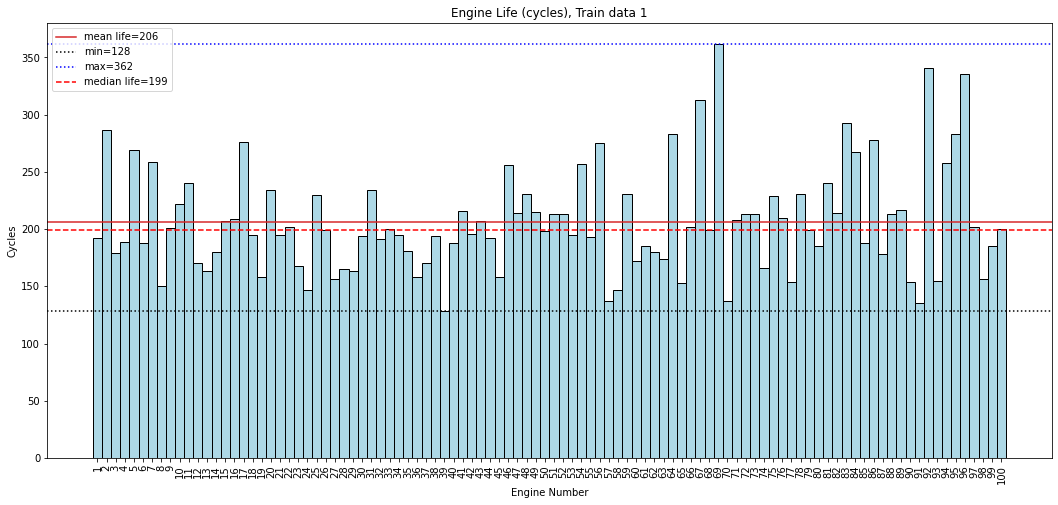

In [31]:
plt.figure(figsize=(18,8))
plt.bar(np.arange(100),table1.cyc,width=1,edgecolor='black',color='lightblue')
#plt.grid()
plt.title('Engine Life (cycles), Train data 1')
plt.ylabel('Cycles')
plt.xlabel('Engine Number')
plt.xticks(np.arange(100),rotation=90,labels=np.arange(1,101))
plt.axhline(y=mean_life,c='tab:red',label='mean life='+str(round(mean_life)))
plt.axhline(y=min_life,c='black',label='min='+'%d'%round(min_life),linestyle='dotted')
plt.axhline(y=max_life,c='blue',label='max='+'%d'%round(max_life),linestyle='dotted')
plt.axhline(y=med_life,c='red',linestyle='dashed',label='median life='+str(round(med_life)))
plt.legend()
plt.show()

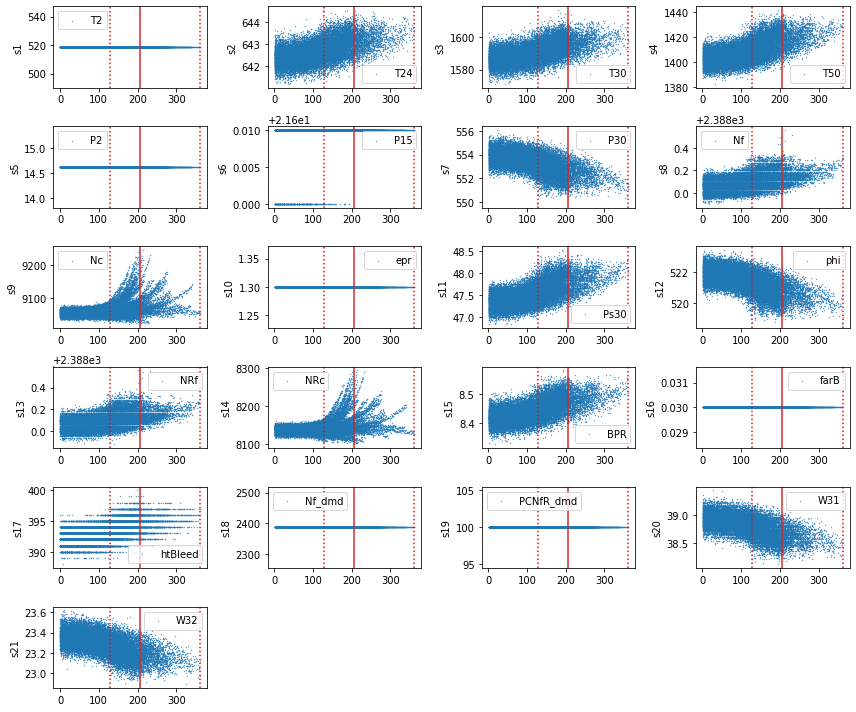

In [41]:
#Creating plot of sensor behaviour against time (cycles)
plt.figure(figsize = (12,10))
for i in range(21):
    plt.subplot(6,4,i+1)
    plt.scatter(df1.cyc,df1['s%d'%(i+1)],s=0.1,label=sensor_d['s%d'%(i+1)][0])
    plt.ylabel('s%d'%(i+1))
    plt.axvline(x=mean_life,color='tab:red')
    plt.axvline(x=min_life,color='red',linestyle='dotted')
    plt.axvline(x=max_life,color='red',linestyle='dotted')
    plt.legend()
    plt.tight_layout()  

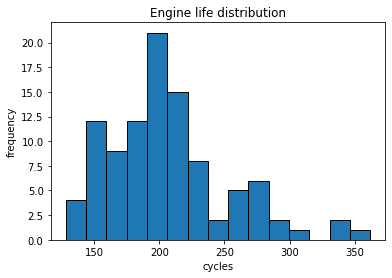

In [33]:
plt.hist(table1.cyc,bins=15,edgecolor='black');
plt.title('Engine life distribution')
plt.xlabel('cycles')
plt.ylabel('frequency')
plt.show()

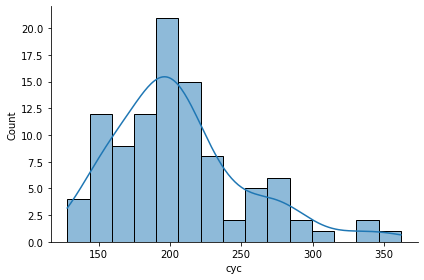

In [98]:
sns.displot(table1.cyc,kde=True,bins=15,height=4,aspect=1.5);

## Correlations

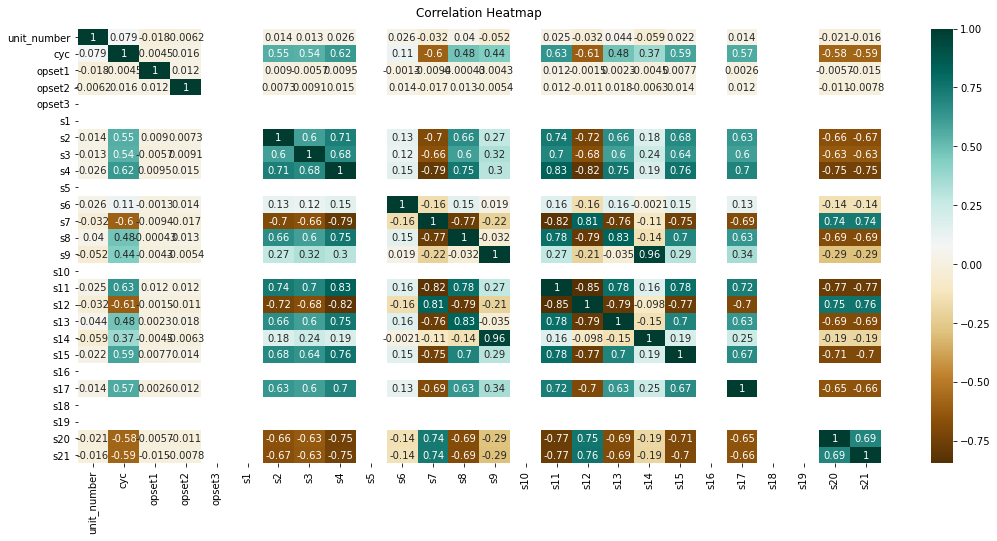

In [34]:
plt.figure(figsize=(18,8))
dataplot = sns.heatmap(df1.corr(),annot=True,cmap='BrBG');
dataplot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [35]:
# Creating an array with the indices on training data where each engine starts and stops
train_index = [0]
for i in df1.groupby('unit_number').cyc.last():
    train_index.append(train_index[-1]+i)
#indices.remove(indices[0])
train_index = np.array(train_index)
train_index.shape
train_index

array([    0,   192,   479,   658,   847,  1116,  1304,  1563,  1713,
        1914,  2136,  2376,  2546,  2709,  2889,  3096,  3305,  3581,
        3776,  3934,  4168,  4363,  4565,  4733,  4880,  5110,  5309,
        5465,  5630,  5793,  5987,  6221,  6412,  6612,  6807,  6988,
        7146,  7316,  7510,  7638,  7826,  8042,  8238,  8445,  8637,
        8795,  9051,  9265,  9496,  9711,  9909, 10122, 10335, 10530,
       10787, 10980, 11255, 11392, 11539, 11770, 11942, 12127, 12307,
       12481, 12764, 12917, 13119, 13432, 13631, 13993, 14130, 14338,
       14551, 14764, 14930, 15159, 15369, 15523, 15754, 15953, 16138,
       16378, 16592, 16885, 17152, 17340, 17618, 17796, 18009, 18226,
       18380, 18515, 18856, 19011, 19269, 19552, 19888, 20090, 20246,
       20431, 20631])

### Loading Test data

In [42]:
test_df1 = pd.read_csv(r"C:\Users\Eduardo\Documents\Data_Testing\CMaps\test_FD001.txt",sep=' |t',header=None,engine='python')
test_df1.columns = df1.columns

In [43]:
test_df1

,unit_number,cyc,opset1,opset2,opset3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [44]:
# Creating an array with the indices on test data where each engine starts and stops
test_index = [0]
for i in test_df1.groupby('unit_number').cyc.last():
    test_index.append(test_index[-1]+i)

test_index = np.array(test_index)
test_index.shape

(101,)

In [45]:
test_index

array([    0,    31,    80,   206,   312,   410,   515,   675,   841,
         896,  1088,  1171,  1388,  1583,  1629,  1705,  1818,  1983,
        2116,  2251,  2435,  2583,  2622,  2752,  2938,  2986,  3062,
        3202,  3360,  3531,  3674,  3870,  4015,  4065,  4268,  4466,
        4592,  4713,  4838,  4875,  5008,  5131,  5287,  5459,  5513,
        5665,  5811,  5884,  5962,  6265,  6339,  6483,  6672,  6836,
        6957,  7070,  7206,  7366,  7542,  7636,  7783,  7942,  8174,
        8329,  8497,  8568,  8715,  8786,  8973,  9027,  9179,  9247,
        9378,  9490,  9627,  9715,  9920, 10082, 10154, 10255, 10388,
       10601, 10763, 10836, 11008, 11042, 11152, 11208, 11276, 11453,
       11599, 11833, 11983, 12227, 12360, 12449, 12546, 12680, 12801,
       12898, 13096])

Loading Actual Remaining Useful Life for comparison with our results

In [46]:
RUL1 = pd.read_csv(r"C:\Users\Eduardo\Documents\Data_Testing\CMaps\RUL_FD001.txt",header=None)
RUL1

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


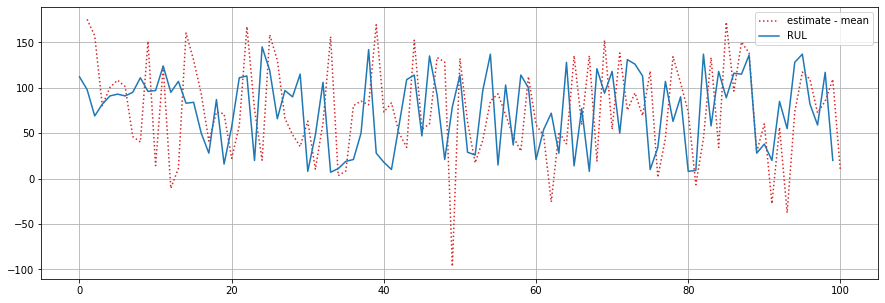

In [68]:
#Plotting the difference or RUL with mean life
plt.figure(figsize=(15,5))
plt.plot(mean_life - test_df1.groupby('unit_number').last()['cyc'],label='estimate - mean',color='tab:red',linestyle='dotted')
plt.plot(RUL1,label='RUL')
plt.legend()
plt.grid()
plt.show()

## Visualizing distribution of each sensor

In [29]:
from sklearn.mixture import GaussianMixture

In [33]:
gmm = GaussianMixture(n_components=11)
gmm.fit(df1[['s2','s3','s4','s7','s8','s11','s12','s13','s15','s20','s21']])
col = gmm.predict(df1[['s2','s3','s4','s7','s8','s11','s12','s13','s15','s20','s21']])

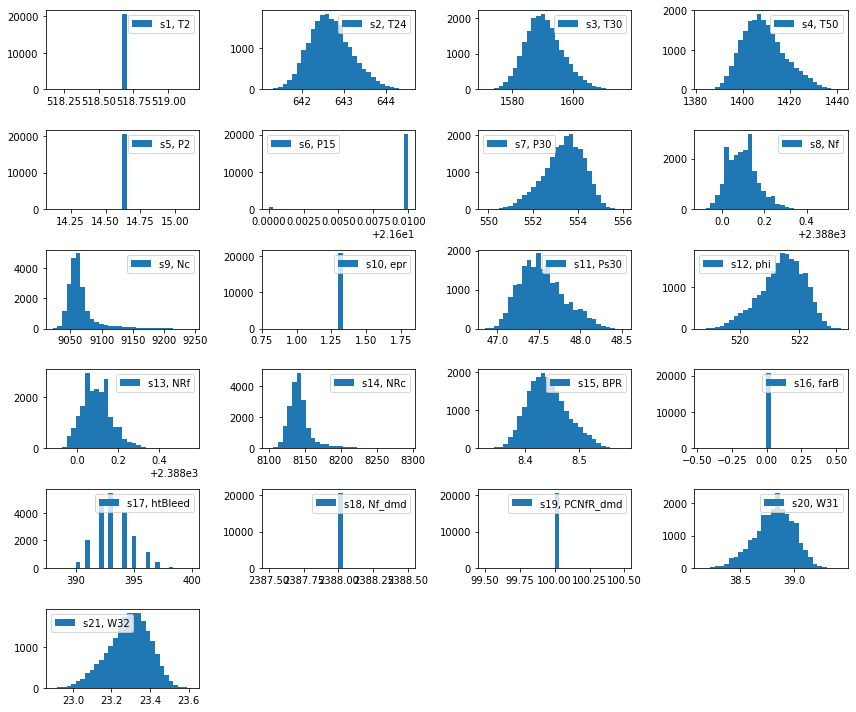

In [51]:
plt.figure(figsize = (12,10))
for i in range(21):
    plt.subplot(6,4,i+1)
    plt.hist(df1['s%d'%(i+1)],bins=30,label='s%d, %s'%((i+1),sensor_d['s%d'%(i+1)][0]))
    plt.legend()
    plt.tight_layout() 

## Visualizing training data of s7 (P30) sensor against life

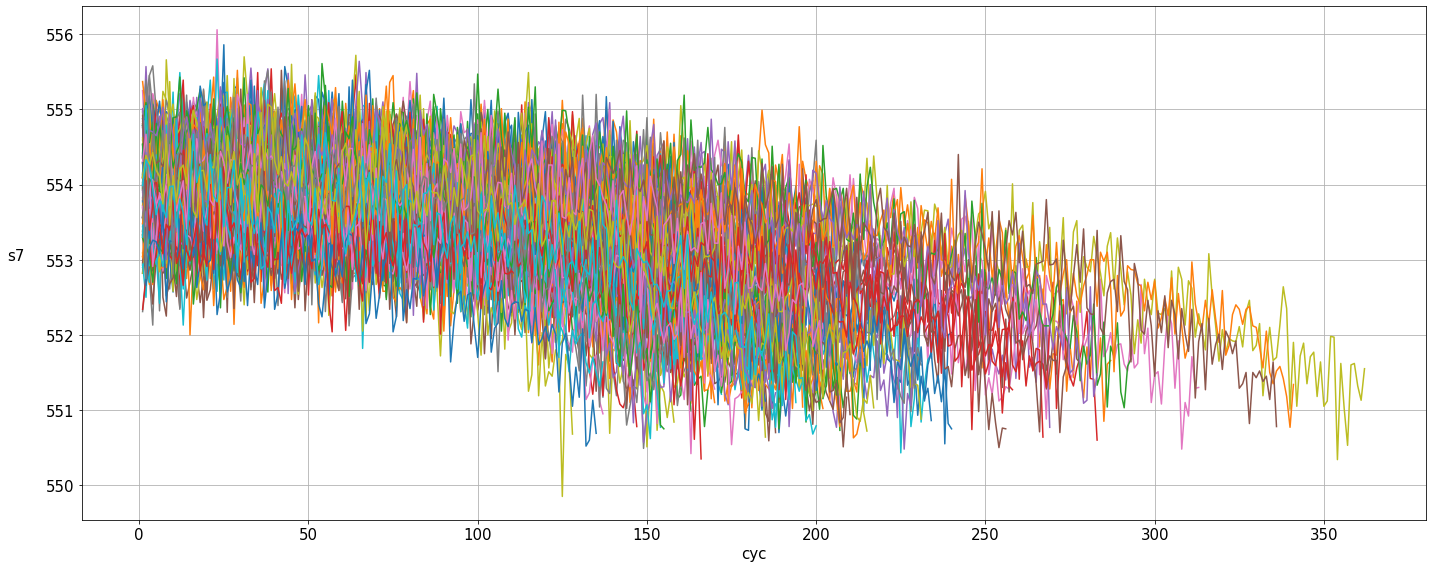

In [22]:
plt.figure(figsize = (20,8))
for i in range(1,101):
    #x3 = df1['RUL'][train_index[i-1]:train_index[i]]
    plt.plot(df1['cyc'][train_index[i-1]:train_index[i]],df1['s7'][train_index[i-1]:train_index[i]])#,label='E_%d'%i)
    
    #plt.xlim(max(x3),min(x3))
plt.ylabel('s7',fontsize=15,rotation=0,labelpad=30)
plt.xlabel('cyc',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()

## Preparing Test data

In [52]:
test_table1 = test_df1.groupby('unit_number').last()

In [53]:
test_mean_life = test_table1.cyc.mean()
print('test mean life =',test_mean_life)
test_min_life = test_table1.cyc.min()
test_max_life = test_table1.cyc.max()
test_med_life = test_table1.cyc.median()
print('test median =',test_med_life)
test_mode = test_table1.cyc.mode()
print('test mode =',test_mode)

test mean life = 130.96
test median = 133.5
test mode = 0    133
dtype: int64


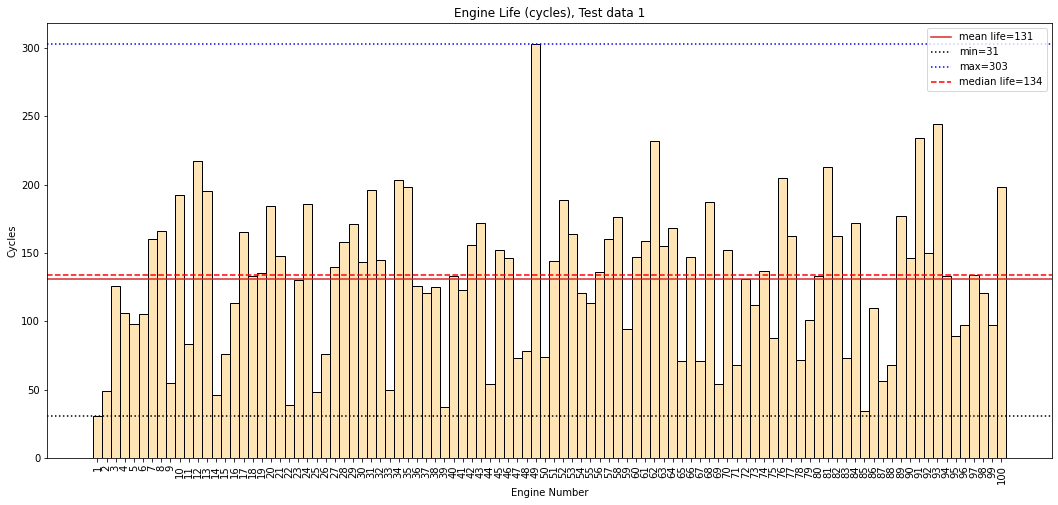

In [54]:
plt.figure(figsize=(18,8))
plt.bar(np.arange(100),test_table1.cyc,width=1,edgecolor='black',color='moccasin')
#plt.grid()
plt.title('Engine Life (cycles), Test data 1')
plt.ylabel('Cycles')
plt.xlabel('Engine Number')
plt.xticks(np.arange(100),rotation=90,labels=np.arange(1,101))
plt.axhline(y=test_mean_life,c='tab:red',label='mean life='+str(round(test_mean_life)))
plt.axhline(y=test_min_life,c='black',label='min='+'%d'%round(test_min_life),linestyle='dotted')
plt.axhline(y=test_max_life,c='blue',label='max='+'%d'%round(test_max_life),linestyle='dotted')
plt.axhline(y=test_med_life,c='red',linestyle='dashed',label='median life='+str(round(test_med_life)))
plt.legend()
plt.show()

## Predicting RUL by Similarity (MSE)

In [57]:
from sklearn.metrics import mean_squared_error

In [56]:
#Comparing each test-data engine with all training-data engines through mse, only parameter "s7", lowest mse gets selected
life = []
for i in range(1,101): #test
    temporary = []
    Test = test_index[i] - test_index[i-1]
    for j in range(1,101): #training
        Train = train_index[j] - train_index[j-1]
        
        Min = min(Train,Test)
        min_ind = [Train,Test].index(Min) # 0 for Train, and 1 for Test
        if min_ind == 0: # min result is training
            tr = 1
            te = 0
        elif min_ind == 1: # min result is test
            tr = 0
            te = 1
        
        temporary.append(mean_squared_error(df1['s7'][train_index[j-1]:train_index[j-1*te]+Min*te],test_df1['s7'][test_index[i-1]:test_index[i-1*tr]+Min*tr]))
    Min_index = temporary.index(min(temporary))
    life.append(table1.cyc[Min_index+1]-test_table1.cyc[i])


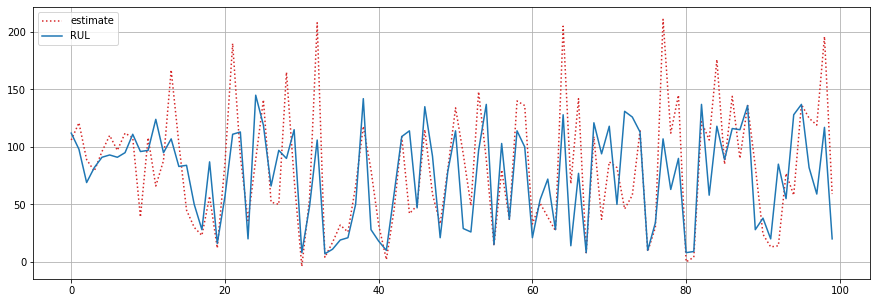

In [58]:
plt.figure(figsize=(15,5))
plt.plot(life,label='estimate',color='tab:red',linestyle='dotted')
plt.plot(RUL1,label='RUL')
plt.legend()
plt.grid()
plt.show()

## Adding more variables (sensors) for different prediction

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
#Testing the scaling
scaler.fit_transform(df1['s8'].values.reshape(-1,1))

array([[0.24242424],
       [0.21212121],
       [0.27272727],
       ...,
       [0.51515152],
       [0.53030303],
       [0.54545455]])

In [65]:
#Adding another variables for different prediction
Vars = ['s7','s4','s15']
train_vals = []
test_vals = []

for i in range(len(Vars)):
    train_vals.append(scaler.fit_transform(df1[Vars[i]].values.reshape(-1,1)))
    test_vals.append(scaler.fit_transform(test_df1[Vars[i]].values.reshape(-1,1)))

train_vals = np.array(train_vals)
test_vals = np.array(test_vals)
train_Vals = np.array(0)
test_Vals = np.array(0)

for j in range(len(Vars)):
    train_Vals = train_Vals + train_vals[i]
    test_Vals = test_Vals + test_vals[i]
    
life = []
for i in range(1,101): #test
    temporary = []
    Test = test_index[i] - test_index[i-1]
    for j in range(1,101): #training
        Train = train_index[j] - train_index[j-1]
        
        Min = min(Train,Test)
        min_ind = [Train,Test].index(Min) # 0 for Train, and 1 for Test
        if min_ind == 0: # min result is training
            tr = 1
            te = 0
        elif min_ind == 1: # min result is test
            tr = 0
            te = 1
        
        temporary.append(mean_squared_error(train_Vals[train_index[j-1]:train_index[j-1*te]+Min*te],test_Vals[test_index[i-1]:test_index[i-1*tr]+Min*tr]))
    Min_index = temporary.index(min(temporary))
    life.append(table1.cyc[Min_index+1]-test_table1.cyc[i])


In [69]:
#Calculating Errors
peaks = 0
diff = life-RUL1[0]
mean_diff = np.mean(abs(diff))
for i in diff:
    if i>0:
        peaks += 1
life = np.array(life)
error = np.sum(abs(life-RUL1[0]))/np.sum(RUL1[0])
print('Total error percentage =',round(error*100,2),'%')
print('Total of engines above true RUL =',peaks,'out of 100\n')
print('Error mean =',round(mean_diff),'cycles')
print('Error std var =',round(np.std(abs(diff))),'cycles')
print('max error =',max(abs(diff)))

Total error percentage = 38.32 %
Total of engines above true RUL = 40 out of 100

Error mean = 29 cycles
Error std var = 24 cycles
max error = 120


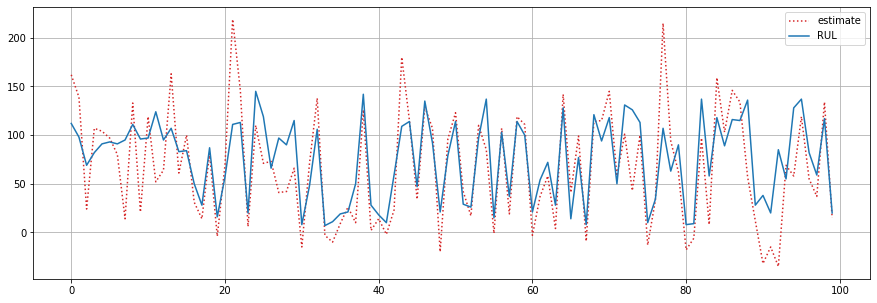

In [67]:
plt.figure(figsize=(15,5))
plt.plot(life,label='estimate',color='tab:red',linestyle='dotted')
plt.plot(RUL1,label='RUL')
plt.legend()
plt.grid()
plt.show()

## Plotting Errors

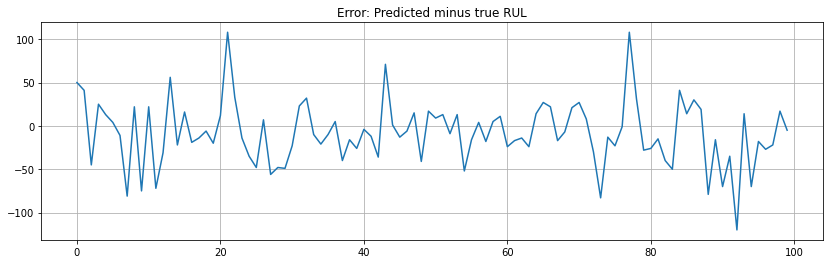

In [240]:
plt.figure(figsize=(14,4))
plt.title('Error: Predicted minus true RUL')
plt.plot(diff)
plt.grid()
plt.show()

In [241]:
lim = 30 # Setting amount of cycles 
up_lim, dwn_lim = [], []
pos = [] #predicted value above RUL
neg = [] #predicted value below RUL
for i in diff:
    if i < 0:
        neg.append(i)
        if abs(i) > lim:
            up_lim.append(i)
        else: dwn_lim.append(i)
    else:
        pos.append(i)
        if abs(i) > lim:
            up_lim.append(i)
        else: dwn_lim.append(i)
            
print('Mean cycles above RUL =',round(np.mean(pos)),', Maximum cyc above RUL =',max(pos))
print('Std dev cyc above RUL =',round(np.std(pos)),'\n')
print('Mean cycles below RUL =',round(abs(np.mean(neg))), ', Maximum cyc below RUL =',abs(min(neg)))
print('Std dev cyc below RUL =',round(abs(np.std(neg))))
print('\nTotal Engines life delta above %d cycles ='%lim,len(up_lim),'---->("NOT SO GOOD PREDICTION ENGINES")')
print('Total Engines life delta below %d cycles ='%lim,len(dwn_lim),'---->("GOOD PREDICTION ENGINES")')

Mean cycles above RUL = 26 , Maximum cyc above RUL = 108
Std dev cyc above RUL = 24 

Mean cycles below RUL = 31 , Maximum cyc below RUL = 120
Std dev cyc below RUL = 24

Total Engines life delta above 30 cycles = 32 ---->("NOT SO GOOD PREDICTION ENGINES")
Total Engines life delta below 30 cycles = 68 ---->("GOOD PREDICTION ENGINES")
